# Analysing Reads by Position

### Downloading the FASTQ file from the URL link


In [ ]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2022-06-18 16:49:39--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.225.141.118, 13.225.141.183, 13.225.141.46, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.225.141.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  1.15MB/s    in 0.2s    

2022-06-18 16:49:39 (1.15 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



### The format of FASTQ file for reference when writing a function to read from a FASTQ file

@SRR835775.1 1/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
+
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################

### Create a function to read sequences from a FASTQ file
#### (Note: fh.readline reads the line but doesn't store the data)
#### (Note: len(seq) determines the end of the sequence while loop is broken)
#### (Note: once the sequence & quality has been read it is appended to the end of the list using the append() function)

In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
          fh.readline()
          seq = fh.readline().rstrip()
          fh.readline()
          qual = fh.readline().rstrip()
          if len(seq) == 0:
              break
          sequences.append(seq)
          qualities.append(qual)
    return sequences, qualities

seqs, quals = readFastq('SRR835775_1.first1000.fastq')

### Print out the first five sequences

In [ ]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']


### Print out the first five quality strings

In [ ]:
print(quals[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


### Find the GC content at each position in the DNA sequence or reads

In [ ]:
def findGCByPos(reads):
  gc = [0] * 100
  totals = [0] * 100

  for read in reads:
    for i in range(len(read)):
      if read[i] == 'C' or read[i] == 'G':
          gc[i] += 1
      totals[i] += 1
  
  for i in range(len(gc)):
    if totals[i] > 0:
        gc[i] /= float(totals[i])

  return gc

gc = findGCByPos(seqs)

### Plot GC content at each position in the DNA sequence or reads

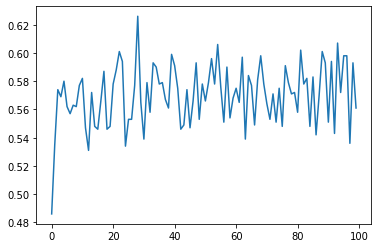

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(range(len(gc)), gc)
plt.show()

### The distribution of nucleotides or bases within these DNA sequences or reads

In [ ]:
import collections
count = collections.Counter()
for seq in seqs:
  count.update(seq)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})
